In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score
from hypopt import GridSearch
from sklearn.svm import SVC

from umap import UMAP

In [12]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/ORBITAL_BT/20-56-02_1"
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"
schiz_emb_file = f"{model_path}/schiz_train_val_test_intra_test_embeddings/full_embeddings.csv"
schiz_path = "/neurospin/dico/data/deep_folding/current/datasets/schiz_extended"
schiz_label_file = f"{schiz_path}/used_schiz_subjects.csv"
train_file = f"{schiz_path}/train_subjects.csv"
val_file = f"{schiz_path}/val_subjects.csv"
test_intra_file = f"{schiz_path}/test_intra_subjects.csv"
test_file = f"{schiz_path}/test_subjects.csv"

In [13]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.223268,-1.910213,-4.233976,23.503736,11.443585,8.791657,-19.330896,9.398713,12.036551,20.609098,...,17.275707,19.637380,23.902270,6.220823,-1.704380,8.290183,-10.330559,1.080888,10.457481,-3.583808
sub-1000458,-1.487145,-11.373998,22.498978,12.430387,13.282054,6.232186,-9.554647,11.808377,11.785677,-1.828716,...,10.948754,3.683073,13.204277,3.243385,2.440976,-21.187466,-19.015520,-8.354998,-5.511058,14.558917
sub-1000575,6.581354,1.730981,23.259293,-16.387560,-1.729303,-7.419610,12.355750,-17.623606,4.551756,18.279514,...,16.038273,21.737465,-6.228678,23.004549,15.599153,14.835086,20.791817,-9.450769,16.728659,3.886695
sub-1000606,-10.529222,-0.987313,27.112442,7.748507,12.663799,-8.886915,21.285873,5.773342,-0.787316,6.343807,...,-2.380115,6.828644,20.211292,5.759085,5.581007,-3.729945,-23.506893,1.081652,18.528513,-3.506488
sub-1000963,-1.465720,3.356936,18.716183,13.292232,-8.116371,3.039847,-8.254723,27.690653,5.612602,23.423693,...,6.647476,9.744260,33.864700,-0.016434,11.216681,-15.389115,-19.265200,11.988581,2.000807,-2.332965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,2.878745,-4.253128,17.483282,-4.064491,-13.859284,-1.935637,13.345888,7.350535,20.608257,0.863736,...,3.249543,21.022793,-5.036903,0.574743,6.367704,34.204155,6.475176,3.726127,13.607699,9.167556
sub-6023808,7.852437,-10.590528,16.383102,-8.025912,-5.520872,-6.413332,18.045626,-7.885871,26.925823,-10.883697,...,9.270588,10.658528,-16.836027,8.665563,13.203258,16.137606,2.157325,-17.735548,18.451640,7.117024
sub-6023847,13.306204,-10.247489,15.500339,18.971727,9.477009,10.342031,-0.777918,12.333806,8.913639,8.128776,...,25.283250,40.150448,13.482981,-0.217624,-1.209999,11.226042,-17.846478,11.902345,10.950462,4.230294


In [14]:
schiz_emb = pd.read_csv(schiz_emb_file, index_col=0)
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,-3.619800,-1.596563,11.896126,6.846393,20.762497,-19.166880,-8.712354,14.708678,18.518270,3.467556,...,11.287587,2.133047,-5.892191,5.319044,16.925348,-4.917510,5.865385,-10.413866,-0.143599,-7.719499
sub-10189_ses-1,-1.414893,-2.159059,18.546246,-0.371030,-6.860616,2.234949,4.037299,-3.782877,15.605975,-29.266310,...,-15.348635,-5.340107,-3.321785,10.350368,-1.895047,21.283808,3.951546,-4.452846,-0.074189,10.903628
sub-10193_ses-1,2.188199,8.536981,6.077495,1.817219,6.975866,17.606106,-7.217526,9.073100,11.602750,0.704119,...,12.944823,10.670447,23.796135,2.836095,9.882308,20.616034,2.969510,-14.045336,13.971803,-18.347775
sub-10206_ses-1,-2.087650,8.870507,21.405708,8.566474,0.000976,-17.372814,9.502311,12.651575,19.379034,5.128404,...,-4.207473,-0.559950,7.422674,7.844898,17.596043,-13.716358,-5.455905,-8.504344,29.667904,-17.386679
sub-10217_ses-1,3.642141,-6.597090,31.410015,-26.228770,22.254742,8.542259,-4.176660,1.941872,11.741402,-3.263000,...,5.519690,-0.319450,6.829252,6.895642,17.084328,4.067525,20.157320,-12.345371,-14.423209,13.525777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,8.261547,-4.511419,12.688785,-9.396230,-3.668066,2.518840,6.086914,-7.009663,15.817110,-18.489130,...,4.564047,0.982273,-15.452584,24.028080,-5.411333,19.995298,1.936357,-0.577119,0.250093,-11.969254
sub-va110289_ses-v1,-2.046206,-10.404838,26.576124,-6.762288,-0.331888,13.155631,10.125683,4.104067,13.886541,-14.503894,...,3.591508,11.050512,5.406847,11.264879,-8.354365,20.266573,-2.886295,-7.396166,11.726696,2.029579
sub-ye110322_ses-v1,4.854223,-9.738771,14.996288,12.231502,-4.475884,5.178200,-9.912812,7.955895,7.532243,4.512352,...,17.796417,16.380520,5.434893,6.621777,1.298451,0.329515,-16.458395,-23.032497,3.382209,-3.219904


In [15]:
schiz_label = pd.read_csv(schiz_label_file, index_col=0)
schiz_label

,sex,age,diagnosis,study,site
participant_id,,,,,
sub-INV07WT2ZL3,M,29,control,BSNIP,Dallas
sub-INV0AL14J6U,M,43,schizophrenia,BSNIP,Dallas
sub-INV14XK7P6E,M,30,control,BSNIP,Dallas
sub-INV1HXNTXYF,F,18,control,BSNIP,Dallas
sub-INV1XCNF4J5,F,25,control,BSNIP,Dallas
...,...,...,...,...,...
182,M,53,schizophrenia,PreCatatoes,Sainte-Anne
183,F,19,schizophrenia,PreCatatoes,Sainte-Anne
184,M,26,control,PreCatatoes,Sainte-Anne


In [16]:
schiz_train = pd.read_csv(train_file, header=None)
schiz_val = pd.read_csv(val_file, header=None)
schiz_test_intra = pd.read_csv(test_intra_file, header=None)
schiz_test = pd.read_csv(test_file, header=None)
schiz_train

,0
0,sub-50033_ses-1
1,sub-CH7458a_ses-v1
2,sub-11066_ses-1
3,sub-INVM0H9UC11
4,sub-ESOC10066_ses-v1
...,...
898,sub-10674_ses-1
899,sub-ESOC10043_ses-v1
900,sub-INVHRLM2K0F
901,sub-NM1010_ses-v1


In [17]:
np.unique(schiz_label.diagnosis)

array(['control', 'schizophrenia'], dtype=object)

# UKBioBank

In [18]:
norm = ukb_emb.apply(np.linalg.norm, axis=1)
ukb_emb = ukb_emb.div(norm, axis=0)

In [19]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.000829,-0.007090,-0.015714,0.087233,0.042472,0.032630,-0.071745,0.034883,0.044673,0.076489,...,0.064118,0.072883,0.088712,0.023088,-0.006326,0.030769,-0.038341,0.004012,0.038812,-0.013301
sub-1000458,-0.006364,-0.048674,0.096282,0.053194,0.056839,0.026670,-0.040888,0.050533,0.050435,-0.007826,...,0.046854,0.015761,0.056506,0.013880,0.010446,-0.090669,-0.081375,-0.035754,-0.023584,0.062303
sub-1000575,0.027890,0.007336,0.098568,-0.069447,-0.007328,-0.031443,0.052361,-0.074685,0.019289,0.077465,...,0.067967,0.092119,-0.026396,0.097488,0.066106,0.062868,0.088111,-0.040050,0.070893,0.016471
sub-1000606,-0.037521,-0.003518,0.096615,0.027612,0.045128,-0.031669,0.075852,0.020573,-0.002806,0.022606,...,-0.008482,0.024334,0.072023,0.020523,0.019888,-0.013292,-0.083767,0.003854,0.066026,-0.012495
sub-1000963,-0.005472,0.012532,0.069870,0.049622,-0.030300,0.011348,-0.030816,0.103373,0.020953,0.087444,...,0.024816,0.036377,0.126422,-0.000061,0.041873,-0.057450,-0.071920,0.044755,0.007469,-0.008709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.011373,-0.016803,0.069071,-0.016058,-0.054754,-0.007647,0.052725,0.029040,0.081417,0.003412,...,0.012838,0.083054,-0.019899,0.002271,0.025157,0.135130,0.025581,0.014721,0.053760,0.036218
sub-6023808,0.028954,-0.039050,0.060408,-0.029593,-0.020357,-0.023647,0.066538,-0.029077,0.099282,-0.040131,...,0.034183,0.039300,-0.062078,0.031952,0.048683,0.059503,0.007955,-0.065395,0.068035,0.026242
sub-6023847,0.055287,-0.042578,0.064403,0.078827,0.039377,0.042971,-0.003232,0.051246,0.037036,0.033775,...,0.105051,0.166823,0.056021,-0.000904,-0.005027,0.046644,-0.074151,0.049454,0.045499,0.017577


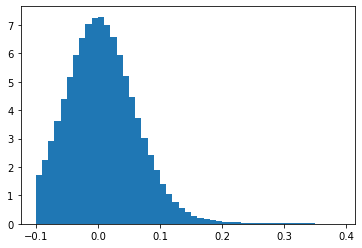

In [20]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

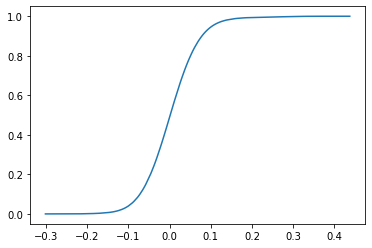

In [21]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [22]:
X2[int(N*0.59)]

0.014449013397726217

In [23]:
len(ukb_emb)

21051

In [24]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [25]:
ukb_positive

dim132    1.000000
dim176    1.000000
dim110    0.989882
dim3      0.968648
dim192    0.903758
            ...   
dim226    0.175384
dim118    0.159090
dim66     0.139423
dim161    0.060947
dim204    0.000000
Length: 256, dtype: float64

In [26]:
ukb_positive[10:50]

dim40     0.862429
dim250    0.849936
dim100    0.844710
dim70     0.820436
dim28     0.803145
dim129    0.794072
dim107    0.793074
dim151    0.765759
dim246    0.758729
dim168    0.753076
dim152    0.747613
dim248    0.746378
dim162    0.744905
dim99     0.739490
dim239    0.738302
dim33     0.735119
dim101    0.726806
dim31     0.726189
dim93     0.724526
dim238    0.724289
dim128    0.720441
dim65     0.711510
dim125    0.697212
dim26     0.686476
dim123    0.684101
dim144    0.682010
dim198    0.681203
dim85     0.673650
dim91     0.668519
dim206    0.665954
dim138    0.665384
dim88     0.662391
dim157    0.656691
dim45     0.653793
dim24     0.651656
dim255    0.649185
dim73     0.646288
dim37     0.646240
dim193    0.644815
dim21     0.643865
dtype: float64

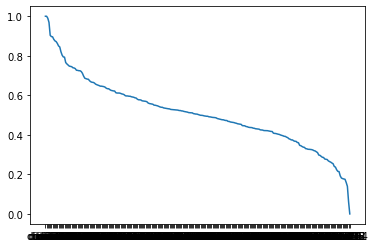

In [27]:
plt.plot(ukb_positive)

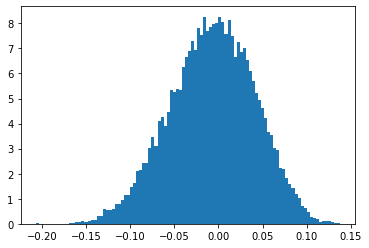

In [28]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

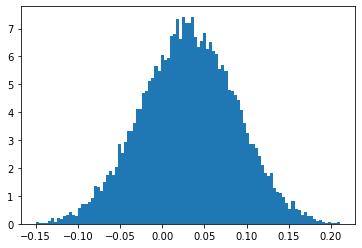

In [29]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

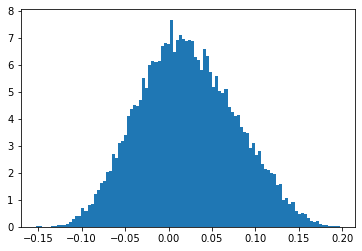

In [30]:
p = plt.hist(ukb_emb.loc[:,"dim188"], bins=100, density=True)

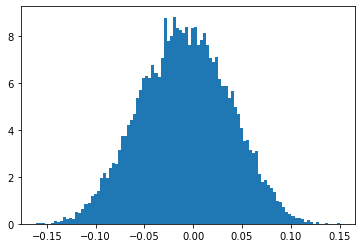

In [31]:
p = plt.hist(ukb_emb.loc[:,"dim10"], bins=100, density=True)

# Schizophrene

In [32]:
norm = schiz_emb.apply(np.linalg.norm, axis=1)
schiz_emb = schiz_emb.div(norm, axis=0)

In [33]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [34]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

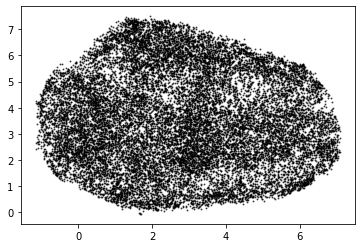

In [35]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [36]:
visual_schiz_emb = reducer.transform(schiz_emb)

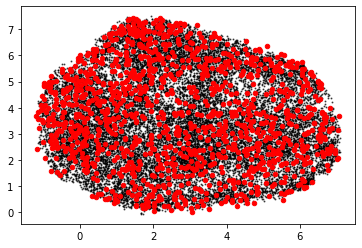

In [37]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)
plt.scatter(visual_schiz_emb[:,0], visual_schiz_emb[:,1], c='red', s=20, alpha=1)

In [38]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)

In [39]:
schiz_order = schiz_emb.copy()
schiz_order.loc["ukb_positive",:] = ukb_positive
schiz_order

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,-0.014748,-0.006505,0.048467,0.027894,0.084591,-0.078090,-0.035496,0.059926,0.075447,0.014128,...,0.045988,0.008690,-0.024006,0.021671,0.068957,-0.020035,0.023897,-0.042428,-0.000585,-0.031451
sub-10189_ses-1,-0.005081,-0.007753,0.066596,-0.001332,-0.024635,0.008025,0.014497,-0.013584,0.056038,-0.105089,...,-0.055114,-0.019175,-0.011928,0.037166,-0.006805,0.076426,0.014189,-0.015989,-0.000266,0.039153
sub-10193_ses-1,0.009279,0.036201,0.025771,0.007706,0.029581,0.074658,-0.030606,0.038474,0.049201,0.002986,...,0.054892,0.045248,0.100907,0.012026,0.041906,0.087422,0.012592,-0.059559,0.059247,-0.077803
sub-10206_ses-1,-0.008268,0.035130,0.084774,0.033926,0.000004,-0.068802,0.037632,0.050104,0.076747,0.020310,...,-0.016663,-0.002218,0.029396,0.031068,0.069686,-0.054321,-0.021607,-0.033680,0.117494,-0.068857
sub-10217_ses-1,0.015135,-0.027415,0.130526,-0.108995,0.092481,0.035498,-0.017356,0.008070,0.048792,-0.013560,...,0.022937,-0.001327,0.028379,0.028655,0.070995,0.016903,0.083765,-0.051302,-0.059936,0.056207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,-0.007941,-0.040379,0.103135,-0.026243,-0.001288,0.051054,0.039295,0.015927,0.053890,-0.056286,...,0.013938,0.042884,0.020983,0.043716,-0.032421,0.078649,-0.011201,-0.028703,0.045508,0.007876
sub-ye110322_ses-v1,0.019152,-0.038423,0.059166,0.048257,-0.017659,0.020430,-0.039109,0.031389,0.029717,0.017803,...,0.070213,0.064627,0.021443,0.026125,0.005123,0.001300,-0.064934,-0.090871,0.013344,-0.012704
sub-yh100442_ses-v1,0.006205,-0.037942,0.098619,0.044440,0.050998,0.048605,0.044573,0.036470,0.039432,-0.068556,...,0.013113,0.007389,0.018625,-0.002293,0.011907,-0.047050,-0.094263,0.004336,0.018287,-0.013431


In [40]:
schiz_order = schiz_order.sort_values(schiz_order.last_valid_index(), ascending=False, axis=1)

In [41]:
schiz_order

,dim132,dim176,dim110,dim3,dim192,dim127,dim9,dim61,dim166,dim187,...,dim143,dim120,dim214,dim140,dim126,dim226,dim118,dim66,dim161,dim204
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,0.327312,0.203035,0.090426,0.048467,0.084318,0.033537,0.075447,0.043559,0.152637,0.101660,...,-0.010738,-0.077426,-0.091041,-0.085480,0.012113,-0.045434,-0.102629,-0.016246,-0.063873,-0.161887
sub-10189_ses-1,0.326549,0.179608,0.261257,0.066596,0.035283,0.005057,0.056038,0.059654,0.005018,-0.002358,...,-0.008836,-0.058204,-0.094418,-0.136807,-0.085492,-0.040370,-0.102143,-0.019015,-0.170554,-0.141983
sub-10193_ses-1,0.305416,0.229229,0.090022,0.025771,0.039944,0.039530,0.049201,0.021259,0.144202,0.104738,...,0.016079,-0.171564,-0.000778,-0.085174,-0.045148,-0.105866,-0.079414,-0.037220,-0.122327,-0.199706
sub-10206_ses-1,0.331773,0.196322,0.048374,0.084774,0.061706,0.080582,0.076747,0.058905,0.192719,0.060900,...,-0.060221,-0.103033,-0.047382,-0.027414,0.095601,-0.108432,-0.023585,0.023433,-0.136329,-0.134899
sub-10217_ses-1,0.265594,0.241320,0.138533,0.130526,0.098066,0.133994,0.048792,0.074199,0.161094,0.086667,...,-0.064174,-0.006816,-0.038615,-0.101117,-0.044845,-0.134237,0.001830,-0.021395,0.008943,-0.185488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,0.325223,0.144224,0.250299,0.103135,0.082398,0.087516,0.053890,0.093079,0.075286,0.064893,...,-0.082025,-0.001637,-0.047725,-0.157842,-0.088647,-0.051508,-0.085950,-0.023241,-0.209060,-0.121134
sub-ye110322_ses-v1,0.300976,0.126716,0.101769,0.059166,0.093270,0.089471,0.029717,0.030194,0.189471,0.086201,...,-0.005937,-0.026420,0.002222,-0.089968,-0.014380,-0.081069,-0.097883,-0.082713,-0.085776,-0.151169
sub-yh100442_ses-v1,0.254530,0.172050,0.013630,0.098619,0.119295,0.104702,0.039432,0.000240,0.111070,0.124510,...,-0.030592,-0.053142,-0.170743,-0.027096,-0.052964,-0.085458,0.034204,-0.014375,-0.019377,-0.222555


# Fit on schiz datasets

In [42]:
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,-0.014748,-0.006505,0.048467,0.027894,0.084591,-0.078090,-0.035496,0.059926,0.075447,0.014128,...,0.045988,0.008690,-0.024006,0.021671,0.068957,-0.020035,0.023897,-0.042428,-0.000585,-0.031451
sub-10189_ses-1,-0.005081,-0.007753,0.066596,-0.001332,-0.024635,0.008025,0.014497,-0.013584,0.056038,-0.105089,...,-0.055114,-0.019175,-0.011928,0.037166,-0.006805,0.076426,0.014189,-0.015989,-0.000266,0.039153
sub-10193_ses-1,0.009279,0.036201,0.025771,0.007706,0.029581,0.074658,-0.030606,0.038474,0.049201,0.002986,...,0.054892,0.045248,0.100907,0.012026,0.041906,0.087422,0.012592,-0.059559,0.059247,-0.077803
sub-10206_ses-1,-0.008268,0.035130,0.084774,0.033926,0.000004,-0.068802,0.037632,0.050104,0.076747,0.020310,...,-0.016663,-0.002218,0.029396,0.031068,0.069686,-0.054321,-0.021607,-0.033680,0.117494,-0.068857
sub-10217_ses-1,0.015135,-0.027415,0.130526,-0.108995,0.092481,0.035498,-0.017356,0.008070,0.048792,-0.013560,...,0.022937,-0.001327,0.028379,0.028655,0.070995,0.016903,0.083765,-0.051302,-0.059936,0.056207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,0.033860,-0.018490,0.052005,-0.038510,-0.015033,0.010323,0.024947,-0.028729,0.064826,-0.075777,...,0.018706,0.004026,-0.063332,0.098478,-0.022178,0.081950,0.007936,-0.002365,0.001025,-0.049056
sub-va110289_ses-v1,-0.007941,-0.040379,0.103135,-0.026243,-0.001288,0.051054,0.039295,0.015927,0.053890,-0.056286,...,0.013938,0.042884,0.020983,0.043716,-0.032421,0.078649,-0.011201,-0.028703,0.045508,0.007876
sub-ye110322_ses-v1,0.019152,-0.038423,0.059166,0.048257,-0.017659,0.020430,-0.039109,0.031389,0.029717,0.017803,...,0.070213,0.064627,0.021443,0.026125,0.005123,0.001300,-0.064934,-0.090871,0.013344,-0.012704


In [43]:
schiz_all = pd.merge(schiz_label, schiz_emb, left_index=True, right_index=True)

In [44]:
schiz_all = schiz_all[schiz_all['sex'] == 'F']

In [45]:
d = {'control': 0, "schizophrenia": 1}
train = schiz_all.loc[schiz_all.index.isin(schiz_train[0]),:]
y_train = train['diagnosis'].map(d)
X_train = train.iloc[:, 5:]
val = schiz_all.loc[schiz_all.index.isin(schiz_val[0]),:]
y_val = val['diagnosis'].map(d)
X_val = val.iloc[:, 5:]
test_intra = schiz_all.loc[schiz_all.index.isin(schiz_test_intra[0]),:]
y_test_intra = test_intra['diagnosis'].map(d)
X_test_intra = test_intra.iloc[:, 5:]
test = schiz_all.loc[schiz_all.index.isin(schiz_test[0]),:]
y_test = test['diagnosis'].map(d)
X_test = test.iloc[:, 5:]

In [46]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV25C66ABC,F,49,schizophrenia,BSNIP,Dallas,0.003074,-0.018285,0.090904,-0.056693,-0.003900,...,0.062844,0.073220,0.097374,0.027878,0.002313,0.001369,-0.055191,-0.054771,0.003652,-0.006003
sub-INV4FRH8AGB,F,35,control,BSNIP,Dallas,-0.006334,0.028090,0.007607,0.072191,-0.064001,...,0.006050,0.040656,0.039374,0.101479,-0.008965,0.034706,-0.043566,0.014436,0.078011,-0.073930
sub-INV55WRBHP3,F,48,schizophrenia,BSNIP,Dallas,-0.014258,-0.050727,0.084153,0.016312,0.063157,...,0.101452,0.094981,0.069471,0.024866,0.061652,-0.058391,-0.065556,0.071546,0.002837,0.082746
sub-INV6GG8BG9T,F,45,control,BSNIP,Dallas,-0.009109,-0.037210,0.084162,0.105658,0.017513,...,0.047683,0.067015,0.039837,-0.010007,0.049364,-0.134577,-0.124265,-0.001323,0.038580,-0.017938
sub-INV72530YM1,F,54,control,BSNIP,Dallas,0.006606,0.012117,0.021162,-0.025614,0.032804,...,0.012817,-0.036791,0.057846,0.081166,-0.015628,0.040757,0.017830,0.046213,-0.031776,-0.020096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10099_ses-v1,F,23,control,PRAGUE,PRAGUE,0.057840,0.038400,0.063607,-0.051956,-0.085157,...,-0.049425,0.019238,-0.107583,0.063679,0.037011,0.151420,0.092417,-0.044081,0.053963,-0.049716
sub-ESOC10013_ses-v1,F,28,control,PRAGUE,PRAGUE,-0.038113,-0.068295,0.091427,-0.012148,0.001484,...,0.031666,-0.027503,-0.052348,0.081665,0.019650,-0.038940,-0.027404,0.023810,0.048469,0.050864
sub-ESOC10060_ses-v1,F,26,control,PRAGUE,PRAGUE,0.015269,-0.016879,0.064579,0.022652,-0.041831,...,0.039823,0.072613,-0.057623,0.120154,-0.000760,0.057585,-0.011185,0.013842,0.026030,-0.043137
sub-ESOC10019_ses-v1,F,28,control,PRAGUE,PRAGUE,-0.029661,-0.014080,0.075149,0.097320,-0.012227,...,-0.026293,0.030026,-0.026243,0.004027,0.048506,-0.030150,-0.100574,0.050028,0.106243,-0.033194


In [47]:
X_train.shape

(405, 256)

In [48]:
bst = XGBClassifier(max_depth=1, min_child_weight=5, alpha=1, learning_rate=0.001, objective='binary:logistic')

In [49]:
X_train.shape

(405, 256)

In [50]:
y_train.shape

(405,)

In [51]:
bst.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
roc_auc_score(y_train, bst.predict_proba(X_train)[:,1])

0.6443328335832084

In [53]:
roc_auc_score(y_val, bst.predict_proba(X_val)[:,1])

0.5077220077220077

In [54]:
roc_auc_score(y_test_intra, bst.predict_proba(X_test_intra)[:,1])

0.5376447876447876

In [55]:
roc_auc_score(y_test, bst.predict_proba(X_test)[:,1])

0.4455128205128205

In [56]:
param_grid = {
    'max_depth': [1],
    'learning_rate': [0.0001],
    'subsample': [0.2]
}

In [57]:
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)

In [58]:
X.shape

(456, 256)

In [59]:
# Grid-search all parameter combinations using a validation set.
opt = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic'), cv=pds, param_grid = param_grid)
opt.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.0001], 'max_depth': [1],
                         'subsample': [0.2]})

In [60]:
roc_auc_score(y_train, opt.best_estimator_.predict_proba(X_train)[:,1])

0.7264017991004498

In [61]:
roc_auc_score(y_val, opt.best_estimator_.predict_proba(X_val)[:,1])

0.752895752895753

In [62]:
roc_auc_score(y_test_intra, opt.best_estimator_.predict_proba(X_test_intra)[:,1])

0.5945945945945946

In [63]:
roc_auc_score(y_test, opt.best_estimator_.predict_proba(X_test)[:,1])

0.33974358974358976

In [64]:
opt.best_params_

{'learning_rate': 0.0001, 'max_depth': 1, 'subsample': 0.2}

# UMAP

In [65]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.000829,-0.007090,-0.015714,0.087233,0.042472,0.032630,-0.071745,0.034883,0.044673,0.076489,...,0.064118,0.072883,0.088712,0.023088,-0.006326,0.030769,-0.038341,0.004012,0.038812,-0.013301
sub-1000458,-0.006364,-0.048674,0.096282,0.053194,0.056839,0.026670,-0.040888,0.050533,0.050435,-0.007826,...,0.046854,0.015761,0.056506,0.013880,0.010446,-0.090669,-0.081375,-0.035754,-0.023584,0.062303
sub-1000575,0.027890,0.007336,0.098568,-0.069447,-0.007328,-0.031443,0.052361,-0.074685,0.019289,0.077465,...,0.067967,0.092119,-0.026396,0.097488,0.066106,0.062868,0.088111,-0.040050,0.070893,0.016471
sub-1000606,-0.037521,-0.003518,0.096615,0.027612,0.045128,-0.031669,0.075852,0.020573,-0.002806,0.022606,...,-0.008482,0.024334,0.072023,0.020523,0.019888,-0.013292,-0.083767,0.003854,0.066026,-0.012495
sub-1000963,-0.005472,0.012532,0.069870,0.049622,-0.030300,0.011348,-0.030816,0.103373,0.020953,0.087444,...,0.024816,0.036377,0.126422,-0.000061,0.041873,-0.057450,-0.071920,0.044755,0.007469,-0.008709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.011373,-0.016803,0.069071,-0.016058,-0.054754,-0.007647,0.052725,0.029040,0.081417,0.003412,...,0.012838,0.083054,-0.019899,0.002271,0.025157,0.135130,0.025581,0.014721,0.053760,0.036218
sub-6023808,0.028954,-0.039050,0.060408,-0.029593,-0.020357,-0.023647,0.066538,-0.029077,0.099282,-0.040131,...,0.034183,0.039300,-0.062078,0.031952,0.048683,0.059503,0.007955,-0.065395,0.068035,0.026242
sub-6023847,0.055287,-0.042578,0.064403,0.078827,0.039377,0.042971,-0.003232,0.051246,0.037036,0.033775,...,0.105051,0.166823,0.056021,-0.000904,-0.005027,0.046644,-0.074151,0.049454,0.045499,0.017577


In [66]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV25C66ABC,F,49,schizophrenia,BSNIP,Dallas,0.003074,-0.018285,0.090904,-0.056693,-0.003900,...,0.062844,0.073220,0.097374,0.027878,0.002313,0.001369,-0.055191,-0.054771,0.003652,-0.006003
sub-INV4FRH8AGB,F,35,control,BSNIP,Dallas,-0.006334,0.028090,0.007607,0.072191,-0.064001,...,0.006050,0.040656,0.039374,0.101479,-0.008965,0.034706,-0.043566,0.014436,0.078011,-0.073930
sub-INV55WRBHP3,F,48,schizophrenia,BSNIP,Dallas,-0.014258,-0.050727,0.084153,0.016312,0.063157,...,0.101452,0.094981,0.069471,0.024866,0.061652,-0.058391,-0.065556,0.071546,0.002837,0.082746
sub-INV6GG8BG9T,F,45,control,BSNIP,Dallas,-0.009109,-0.037210,0.084162,0.105658,0.017513,...,0.047683,0.067015,0.039837,-0.010007,0.049364,-0.134577,-0.124265,-0.001323,0.038580,-0.017938
sub-INV72530YM1,F,54,control,BSNIP,Dallas,0.006606,0.012117,0.021162,-0.025614,0.032804,...,0.012817,-0.036791,0.057846,0.081166,-0.015628,0.040757,0.017830,0.046213,-0.031776,-0.020096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10099_ses-v1,F,23,control,PRAGUE,PRAGUE,0.057840,0.038400,0.063607,-0.051956,-0.085157,...,-0.049425,0.019238,-0.107583,0.063679,0.037011,0.151420,0.092417,-0.044081,0.053963,-0.049716
sub-ESOC10013_ses-v1,F,28,control,PRAGUE,PRAGUE,-0.038113,-0.068295,0.091427,-0.012148,0.001484,...,0.031666,-0.027503,-0.052348,0.081665,0.019650,-0.038940,-0.027404,0.023810,0.048469,0.050864
sub-ESOC10060_ses-v1,F,26,control,PRAGUE,PRAGUE,0.015269,-0.016879,0.064579,0.022652,-0.041831,...,0.039823,0.072613,-0.057623,0.120154,-0.000760,0.057585,-0.011185,0.013842,0.026030,-0.043137
sub-ESOC10019_ses-v1,F,28,control,PRAGUE,PRAGUE,-0.029661,-0.014080,0.075149,0.097320,-0.012227,...,-0.026293,0.030026,-0.026243,0.004027,0.048506,-0.030150,-0.100574,0.050028,0.106243,-0.033194


In [67]:
train.iloc[:,5:]

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV25C66ABC,0.003074,-0.018285,0.090904,-0.056693,-0.003900,0.032839,0.011508,-0.025041,-0.095180,0.007330,...,0.062844,0.073220,0.097374,0.027878,0.002313,0.001369,-0.055191,-0.054771,0.003652,-0.006003
sub-INV4FRH8AGB,-0.006334,0.028090,0.007607,0.072191,-0.064001,0.021630,-0.049303,0.000908,0.068130,0.040874,...,0.006050,0.040656,0.039374,0.101479,-0.008965,0.034706,-0.043566,0.014436,0.078011,-0.073930
sub-INV55WRBHP3,-0.014258,-0.050727,0.084153,0.016312,0.063157,0.062571,0.002129,0.040203,0.035905,0.071029,...,0.101452,0.094981,0.069471,0.024866,0.061652,-0.058391,-0.065556,0.071546,0.002837,0.082746
sub-INV6GG8BG9T,-0.009109,-0.037210,0.084162,0.105658,0.017513,0.002935,-0.020950,0.064333,0.033120,0.031838,...,0.047683,0.067015,0.039837,-0.010007,0.049364,-0.134577,-0.124265,-0.001323,0.038580,-0.017938
sub-INV72530YM1,0.006606,0.012117,0.021162,-0.025614,0.032804,0.079498,-0.009203,0.004419,0.044150,-0.037771,...,0.012817,-0.036791,0.057846,0.081166,-0.015628,0.040757,0.017830,0.046213,-0.031776,-0.020096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10099_ses-v1,0.057840,0.038400,0.063607,-0.051956,-0.085157,-0.027069,0.062237,-0.044436,0.071407,-0.086891,...,-0.049425,0.019238,-0.107583,0.063679,0.037011,0.151420,0.092417,-0.044081,0.053963,-0.049716
sub-ESOC10013_ses-v1,-0.038113,-0.068295,0.091427,-0.012148,0.001484,0.075317,0.046021,-0.032190,0.093385,-0.027250,...,0.031666,-0.027503,-0.052348,0.081665,0.019650,-0.038940,-0.027404,0.023810,0.048469,0.050864
sub-ESOC10060_ses-v1,0.015269,-0.016879,0.064579,0.022652,-0.041831,-0.040579,-0.026490,-0.016712,0.062834,0.005479,...,0.039823,0.072613,-0.057623,0.120154,-0.000760,0.057585,-0.011185,0.013842,0.026030,-0.043137
sub-ESOC10019_ses-v1,-0.029661,-0.014080,0.075149,0.097320,-0.012227,-0.027604,0.058056,0.050569,0.079674,-0.010036,...,-0.026293,0.030026,-0.026243,0.004027,0.048506,-0.030150,-0.100574,0.050028,0.106243,-0.033194


In [68]:
reducer = UMAP()
umap_ukb = reducer.fit_transform(ukb_emb)

In [69]:
umap_schiz = reducer.transform(train.iloc[:, 5:])

In [70]:
umap_ukb.shape

(21051, 2)

In [71]:
cmap = {'control':'b', 'schizophrenia':'r'}
colors = [cmap[diag] for diag in train.diagnosis]

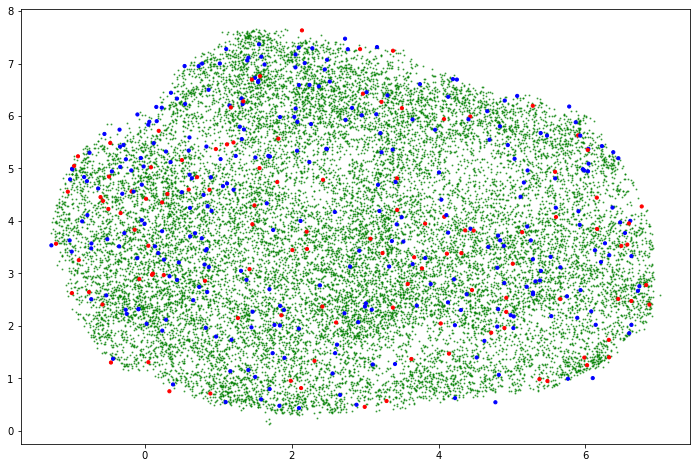

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_schiz[:,0], umap_schiz[:,1], s=10, c=colors, alpha=1)
plt.show()